# Submitted by : Trashi Singh
## Task 2 : To analys the best seller data by category
## BY :  DataInfoSec
#### Hello everyone,
#### I work on best seller by category data set. I use some methos to examine data set.

### Imported required libraries and perform some basic statical operations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from termcolor import colored
import os

import warnings
warnings.filterwarnings("ignore")



For clean visualization,set matplotlib config.


In [2]:
# readint the data set and inspect 
data = pd.read_csv("b_w_c.csv")
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
# chekcing columns
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [4]:
data.index   #checking index

RangeIndex(start=0, stop=550, step=1)

In [5]:
data.describe(include='all') # basic stastical description

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550.000000,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.618364,11953.281818,13.100000,2014.000000,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,3.165156,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,2011.000000,NaN
50%,NaN,NaN,4.700000,8580.000000,11.000000,2014.000000,NaN
75%,NaN,NaN,4.800000,17253.250000,16.000000,2017.000000,NaN


In [6]:
data.info() #information of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
data.nunique()  # checking of no. of unque values

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [8]:
data.isnull().sum() #cheking for null values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Hence, there are no null values 

In [9]:
data.duplicated().sum() # checking for total no of duplicate values

0

In [10]:
# coping the data set
df = data.copy()

df.shape

(550, 7)

In [11]:
# no use of this as we now that there is no null value in the dataset
df = df.dropna()
df.shape

(550, 7)

In [12]:
#For analysis, make Non Fiction data & Fiction data.
Fiction = data[data['Genre'] == 'Fiction']
Non_Fiction = data[data['Genre'] == 'Non Fiction']

## Data visualisation

Text(0.5, 1.0, 'Genre')

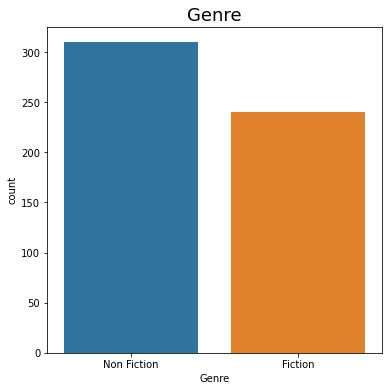

In [13]:
# Plotting the number of Fiction and Non Fiction
sns.countplot(data['Genre'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Genre',size=18)

Text(0.5, 1.0, 'Price vs no. of books sold')

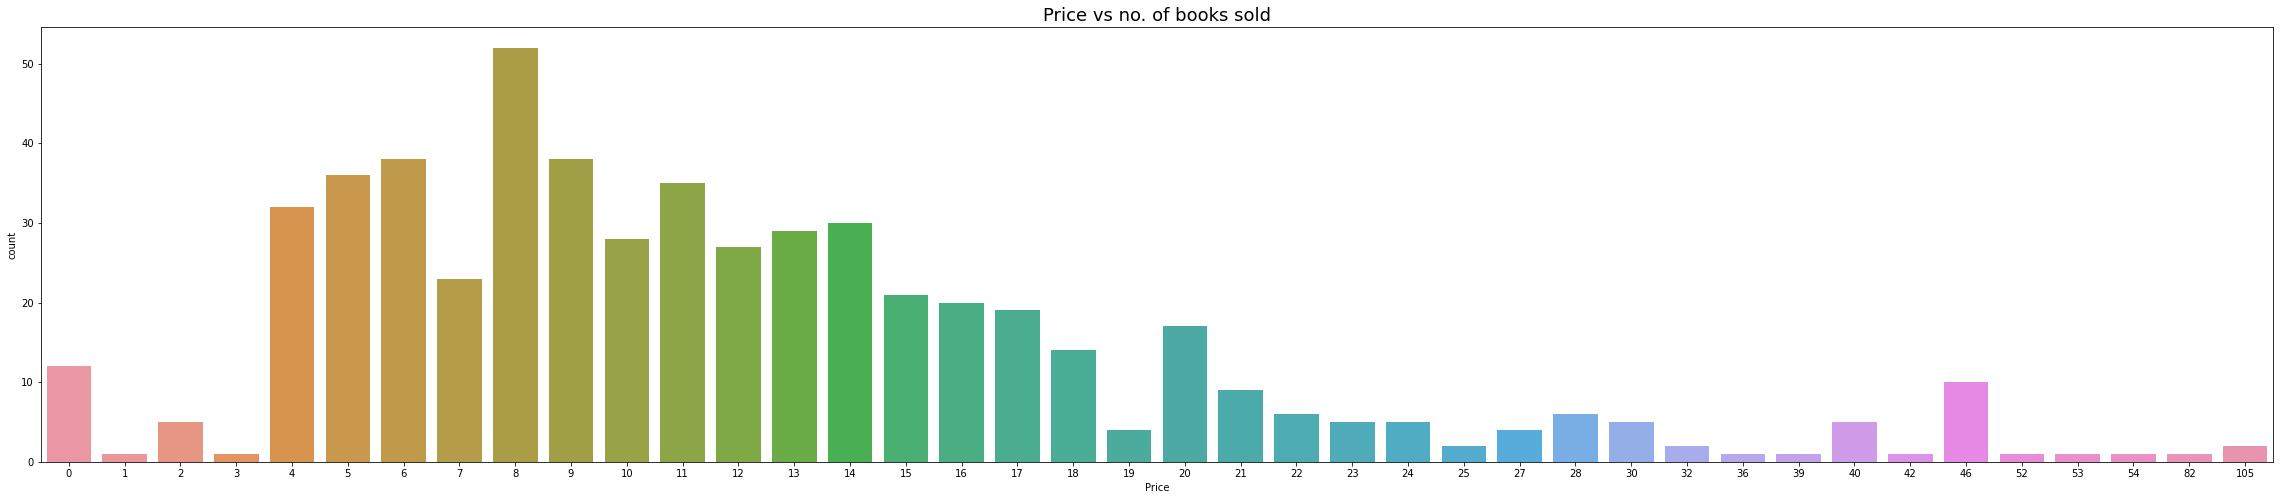

In [14]:
#plotting the ratings
plt.figure(figsize = (40,8))

sns.countplot(x='Price',data = data)
plt.title("Price vs no. of books sold",size=18)

Text(0.5, 1.0, 'Top Authors')

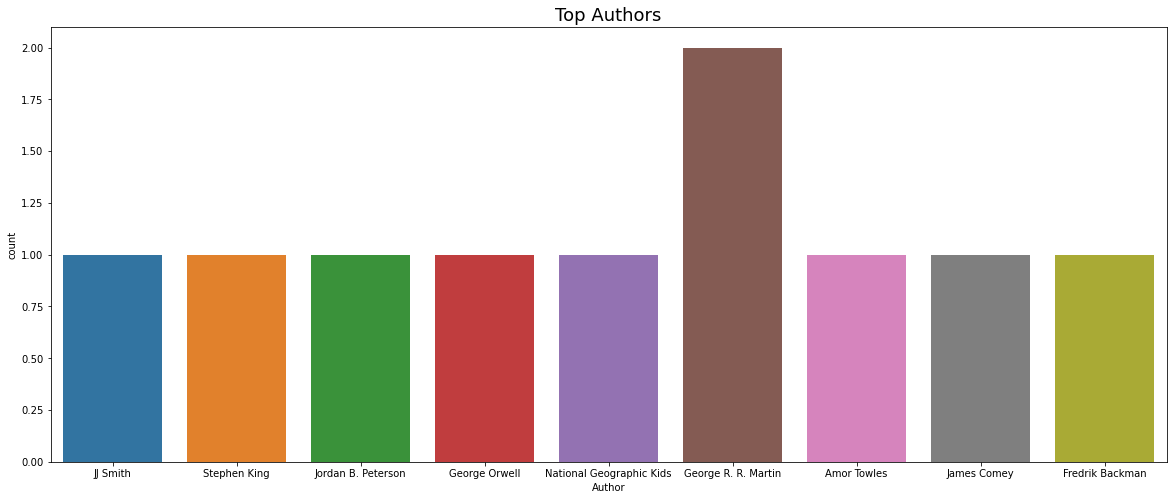

In [15]:
#distribution according to Authors(Top 30 Authors)
plt.figure(figsize = (20,8))
top_author=data[0:10]
sns.countplot(x='Author',data = top_author)
plt.title("Top Authors",size=18)


Text(0.5, 1.0, 'Frequency of Non Fiction books sold per Year')

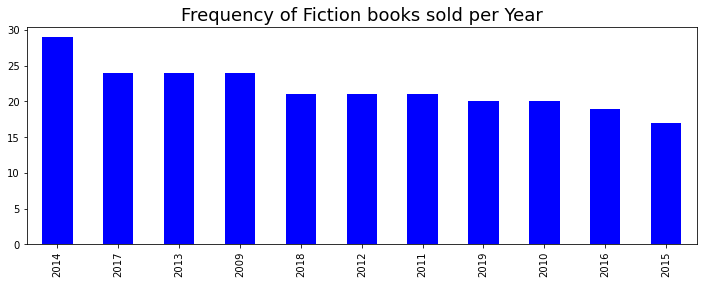

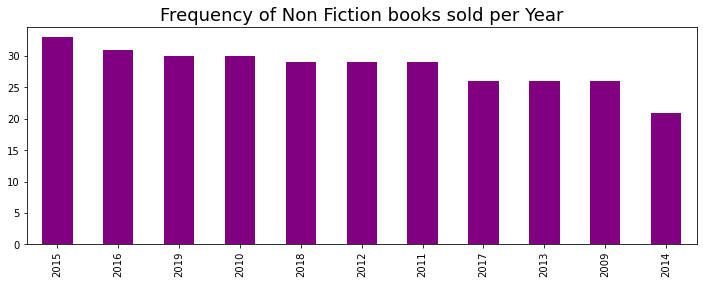

In [16]:
#Frequency of Fiction and Non Fiction books which were Sold in different years

plt.figure(figsize=(12,4))
data[data["Genre"]=="Fiction"]["Year"].value_counts()[:20].plot(kind="bar",color="blue")
plt.title("Frequency of Fiction books sold per Year",size=18)
#Frequency of Fiction books which were Sold in different years

plt.figure(figsize=(12,4))
data[data["Genre"]=="Non Fiction"]["Year"].value_counts()[:20].plot(kind="bar",color="purple")
plt.title("Frequency of Non Fiction books sold per Year",size=18)

Text(0.5, 1.0, 'Top 10 Genres of Non Fiction with respect to Author')

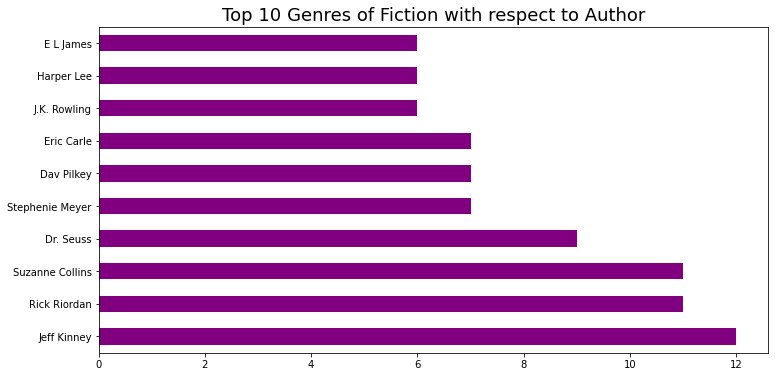

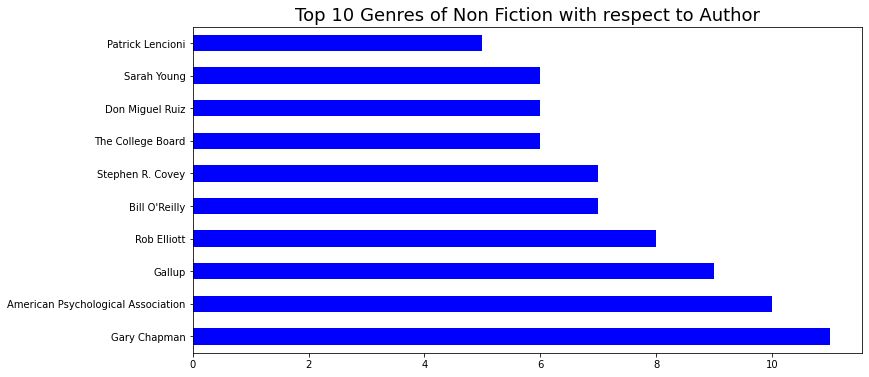

In [17]:
# Top 10 genres of Fiction vs author
plt.figure(figsize=(12,6))
data[data["Genre"]=="Fiction"]["Author"].value_counts()[:10].plot(kind="barh",color="purple")
plt.title("Top 10 Genres of Fiction with respect to Author",size=18)

# Top 10 genres of non Fiction vs author
plt.figure(figsize=(12,6))
data[data["Genre"]=="Non Fiction"]["Author"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 Genres of Non Fiction with respect to Author",size=18)

## word cloud

In [19]:
from wordcloud import WordCloud

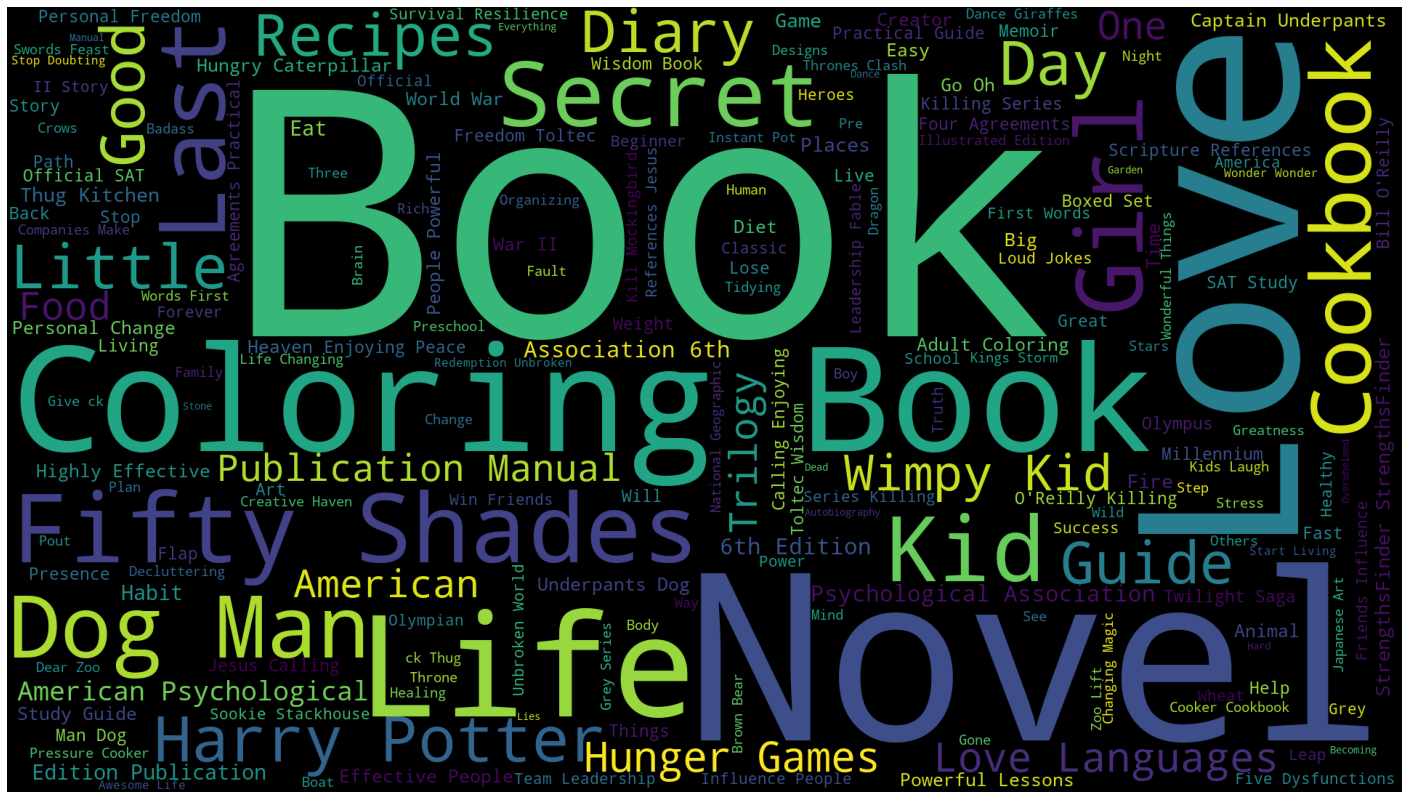

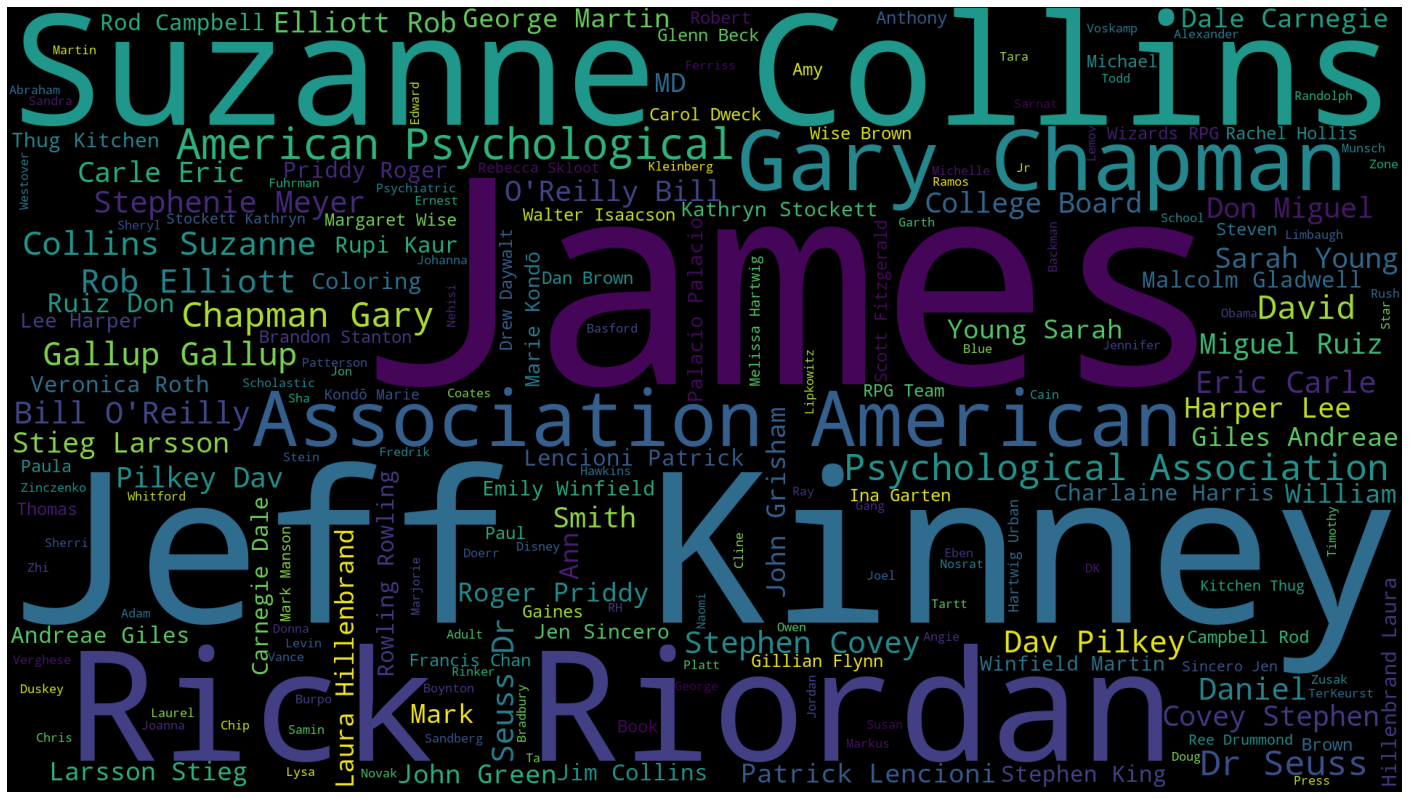

In [20]:
#word cloud for names of the books
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

# word cloud for Author 
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.Author))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('Author.png')
plt.show()

